<a href="https://colab.research.google.com/github/jrohauer/ECGR4105/blob/main/HW2_Gradient_Descent_penalty.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
# Josh Rohauer
# 8007098398
# Homework 2


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
import seaborn as sns
sns.set()

In [12]:
#Problem 1: Gradient Descent Training that predicts housing prices based on 5 or 11 input variables

from google.colab import drive
drive.mount('/content/drive')

file_path = '/content/drive/My Drive/ML_data/Housing.csv'
dataset = pd.read_csv(file_path)

#Preprocessing


#Mapping text to number
varlist =  ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']
def binary_map(x):
    return x.map({'yes': 1, 'no': 0})

dataset[varlist] = dataset[varlist].apply(binary_map)

#Split data into training and validation
np.random.seed(17)
df_train, df_test = train_test_split(dataset, train_size = 0.8, test_size = 0.2, random_state = 100)

#Separate Y and X inputs
#X_Vars = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking']
X_Vars = ['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom','basement','hotwaterheating','airconditioning','parking','prefarea']

Y_train = np.array(df_train['price']).reshape(len(df_train),1)
X_train = df_train[X_Vars]

Y_test = np.array(df_test['price']).reshape(len(df_test),1)
X_test = df_test[X_Vars]



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [13]:
#parameters
alpha = 0.00000001
iterations = 1000

#calcs
n = len(X_train.columns)
m = len(X_train)
iter_number = np.arange(0,iterations,1)

#Add intercept
X0 = np.ones((len(X_train),1))
XT = np.ones((len(X_test),1))
X_train = np.hstack((X0,X_train))
X_test = np.hstack((XT,X_test))

training_loss=[]
validation_loss=[]


In [14]:
#Cost Function and theta calc iteration
def J(X_train,Y_train,X_test,Y_test):
  a = alpha
  theta = np.zeros((n+1,1))

  for i in iter_number:
    Y_hat = X_train.dot(theta)
    errors = np.subtract(Y_hat,Y_train)
    sqrerrors = np.square(errors)
    tcost = 1/(2*m) * sqrerrors.sum()
    training_loss.append(tcost)

    #validation
    Y_hat_test = X_test.dot(theta)
    test_errors = np.subtract(Y_hat_test,Y_test)
    test_sqrerrors = np.square(test_errors)
    vcost = 1/(2*m) * test_sqrerrors.sum()
    validation_loss.append(vcost)



    sum_delta = (a / m) * X_train.transpose().dot(errors)
    theta -= sum_delta

  return theta

Text(0, 0.5, 'Loss Value')

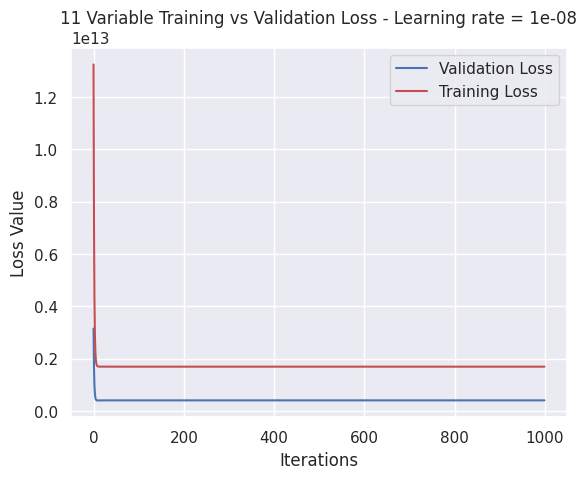

In [15]:
thetas = J(X_train,Y_train,X_test,Y_test)


#Plot validation loss vs Training Loss
fig1, ax = plt.subplots()
ax.plot(validation_loss,'b')
ax.plot(training_loss,'r')
ax.legend(['Validation Loss','Training Loss'])
ax.set_title("11 Variable Training vs Validation Loss"+" - Learning rate = "+str(alpha))
ax.set_xlabel('Iterations')
ax.set_ylabel('Loss Value')

In [16]:
#Problem 2
#Preprocessing
file_path = '/content/drive/My Drive/ML_data/Housing.csv'
dataset = pd.read_csv(file_path)

#Mapping text to number
varlist =  ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']
def binary_map(x):
    return x.map({'yes': 1, 'no': 0})

dataset[varlist] = dataset[varlist].apply(binary_map)

#Split data into training and validation
np.random.seed(17)
df_train, df_test = train_test_split(dataset, train_size = 0.8, test_size = 0.2, random_state = 100)

#Separate Y and X inputs
#X_Vars = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking']
X_Vars = ['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom','basement','hotwaterheating','airconditioning','parking','prefarea']

Y_train = np.array(df_train['price']).reshape(len(df_train),1)
X_train = df_train[X_Vars]

Y_test = np.array(df_test['price']).reshape(len(df_test),1)
X_test = df_test[X_Vars]

In [17]:
#Cost Function and theta calc iteration
def J(X_train,Y_train,X_test,Y_test):
  a = alpha
  theta = np.zeros((n+1,1))

  for i in iter_number:
    Y_hat = X_train.dot(theta)
    errors = np.subtract(Y_hat,Y_train)
    sqrerrors = np.square(errors)
    tcost = 1/(2*m) * sqrerrors.sum()
    training_loss.append(tcost)

    #validation
    Y_hat_test = X_test.dot(theta)
    test_errors = np.subtract(Y_hat_test,Y_test)
    test_sqrerrors = np.square(test_errors)
    vcost = 1/(2*m) * test_sqrerrors.sum()
    validation_loss.append(vcost)



    sum_delta = (a / m) * X_train.transpose().dot(errors)
    theta -= sum_delta

  return theta

In [18]:
#Scalar normalization
scalerMM = MinMaxScaler()
scalerSS = StandardScaler()

#calcs
n = len(X_train.columns)
m = len(X_train)
iter_number = np.arange(0,iterations,1)


#Min Max or Standard normalize
#df_train[X_Vars] = scalerMM.fit_transform(df_train[X_Vars])
#df_test[X_Vars] = scalerMM.fit_transform(df_test[X_Vars])
df_train[X_Vars] = scalerSS.fit_transform(df_train[X_Vars])
df_test[X_Vars] = scalerSS.fit_transform(df_test[X_Vars])

X0 = np.ones((len(df_train[X_Vars]),1))
XT = np.ones((len(df_test[X_Vars]),1))
X_train = np.hstack((X0,df_train[X_Vars]))
X_test = np.hstack((XT,df_test[X_Vars]))

Text(0, 0.5, 'Loss Value')

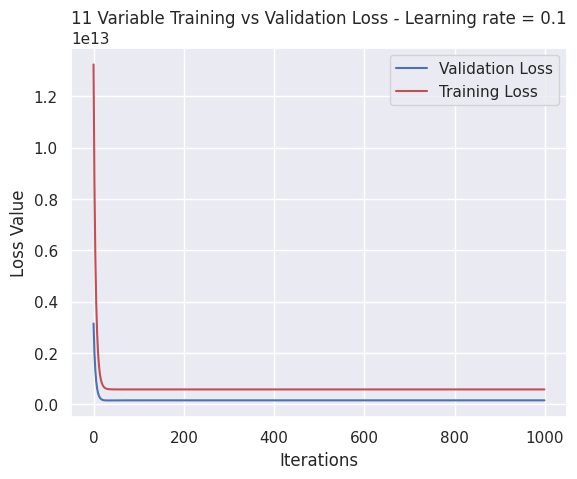

In [19]:
#parameters
alpha = .1
iterations = 2000

training_loss=[]
validation_loss=[]

thetas = J(X_train,Y_train,X_test,Y_test)

fig2, ax1 = plt.subplots()
ax1.plot(validation_loss,'b')
ax1.plot(training_loss,'r')
ax1.legend(['Validation Loss','Training Loss'])
ax1.set_title(str(n)+" Variable Training vs Validation Loss"+" - Learning rate = "+str(alpha))
ax1.set_xlabel('Iterations')
ax1.set_ylabel('Loss Value')

In [20]:
#Problem 3
#Preprocessing
dataset = pd.read_csv(file_path)

#Mapping text to number
varlist =  ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']
def binary_map(x):
    return x.map({'yes': 1, 'no': 0})

dataset[varlist] = dataset[varlist].apply(binary_map)

In [21]:
#Split data into training and validation
np.random.seed(17)
df_train, df_test = train_test_split(dataset, train_size = 0.8, test_size = 0.2, random_state = 100)

#Separate Y and X inputs
#X_Vars = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking']
X_Vars = ['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom','basement','hotwaterheating','airconditioning','parking','prefarea']

Y_train = np.array(df_train['price']).reshape(len(df_train),1)
X_train = df_train[X_Vars]

Y_test = np.array(df_test['price']).reshape(len(df_test),1)
X_test = df_test[X_Vars]

In [22]:
#Cost Function and theta calc iteration
def J(X_train,Y_train,X_test,Y_test):
  a = alpha
  l = lamb
  theta = np.zeros((n+1,1))

  for i in iter_number:
    Y_hat = X_train.dot(theta)
    errors = np.subtract(Y_hat,Y_train)
    sqrerrors = np.square(errors)
    tcost = 1/(2*m) * sqrerrors.sum()
    training_loss.append(tcost)

    #validation
    Y_hat_test = X_test.dot(theta)
    test_errors = np.subtract(Y_hat_test,Y_test)
    test_sqrerrors = np.square(test_errors)
    vcost = 1/(2*m) * test_sqrerrors.sum()
    validation_loss.append(vcost)



    sum_delta = (a / m) * X_train.transpose().dot(errors) + (l/m)*thetas.sum()
    theta -= sum_delta

  return theta

In [23]:
#Scalar normalization
scalerMM = MinMaxScaler()
scalerSS = StandardScaler()

#calcs
n = len(X_train.columns)
m = len(X_train)
iter_number = np.arange(0,iterations,1)


#Min Max or Standard normalize
df_train[X_Vars] = scalerMM.fit_transform(df_train[X_Vars])
df_test[X_Vars] = scalerMM.fit_transform(df_test[X_Vars])
#df_train[X_Vars] = scalerSS.fit_transform(df_train[X_Vars])
#df_test[X_Vars] = scalerSS.fit_transform(df_test[X_Vars])

X0 = np.ones((len(df_train[X_Vars]),1))
XT = np.ones((len(df_test[X_Vars]),1))
X_train = np.hstack((X0,df_train[X_Vars]))
X_test = np.hstack((XT,df_test[X_Vars]))

Text(0, 0.5, 'Loss Value')

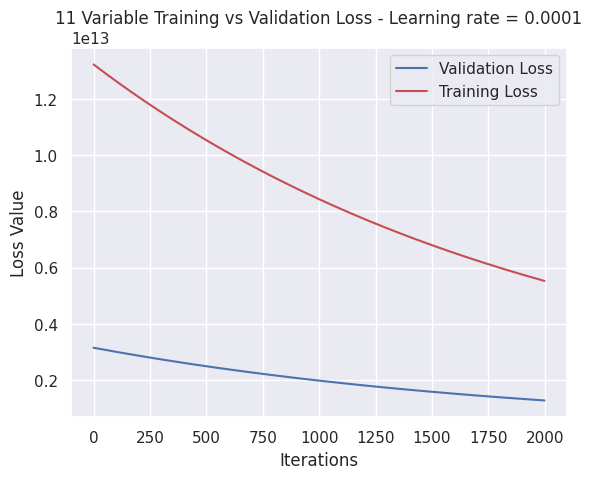

In [24]:
#parameters
alpha = 0.0001
iterations = 500
lamb = .0001

training_loss=[]
validation_loss=[]

thetas = J(X_train,Y_train,X_test,Y_test)

fig2, ax1 = plt.subplots()
ax1.plot(validation_loss,'b')
ax1.plot(training_loss,'r')
ax1.legend(['Validation Loss','Training Loss'])
ax1.set_title(str(n)+" Variable Training vs Validation Loss"+" - Learning rate = "+str(alpha))
ax1.set_xlabel('Iterations')
ax1.set_ylabel('Loss Value')